# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
from itertools import product
from sklearn.svm import SVC
import numpy as np
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False


def shatter(y, S_n):
    model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
    if all(y) or not any(y):
        return True
    y_arr = np.array(y)
    model = model.fit(S_n, y_arr)
    pred = model.predict(S_n)
    if not np.all(pred == y_arr):
        return False
    return True

def is_shattered(d, n, S_n):
    assert S_n.shape == (n, d)

    flat_pos = product([0,1], repeat=n)
    for y in flat_pos:
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        y_arr = np.array(y)
        if np.all(y_arr==1) or np.all(y_arr==0):
            continue
        if len(S_n.shape) == 1:
            S_n = S_n.reshape(-1, 1)
        model = model.fit(S_n, y_arr)
        pred = model.predict(S_n)
        if not np.all(pred == y_arr):
            return False
    return True

In [2]:
from itertools import product

In [3]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

### c)

In [4]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)
d = 2
n = 4
point_set = np.random.normal(size=(n, d))

is_shattered(d,n, point_set)



False

/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_27267/3212251642.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


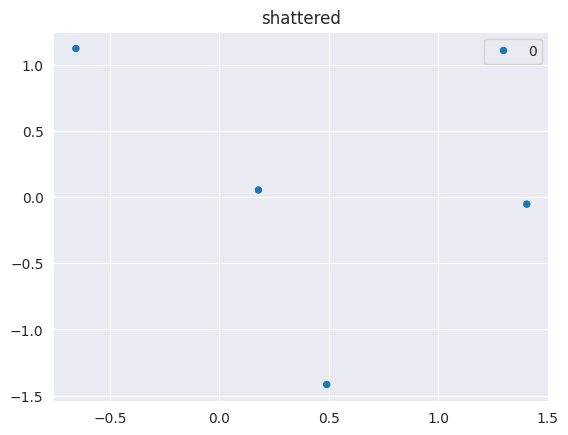

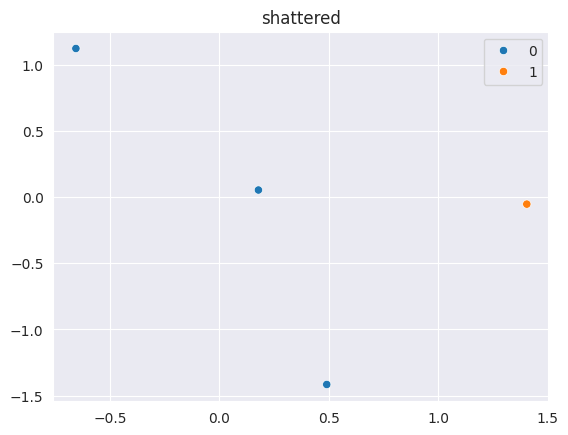

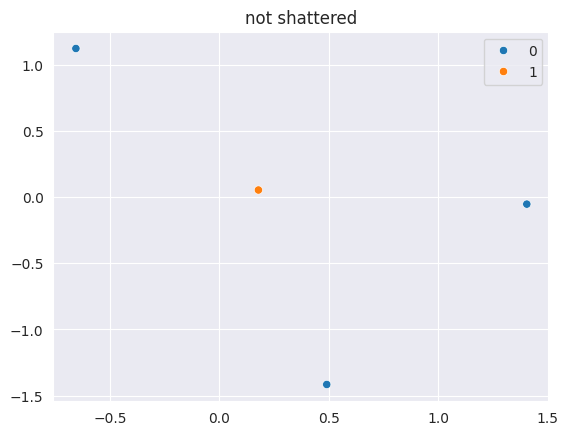

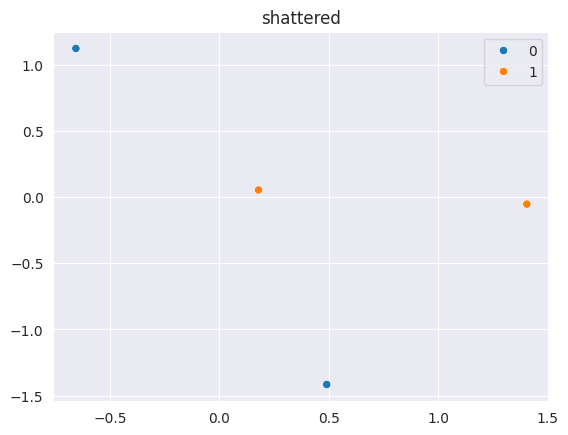

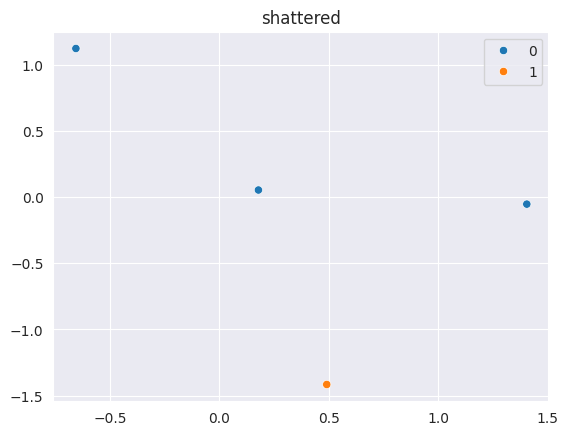

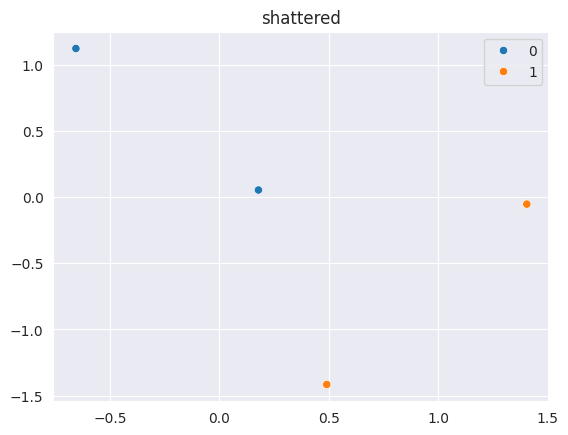

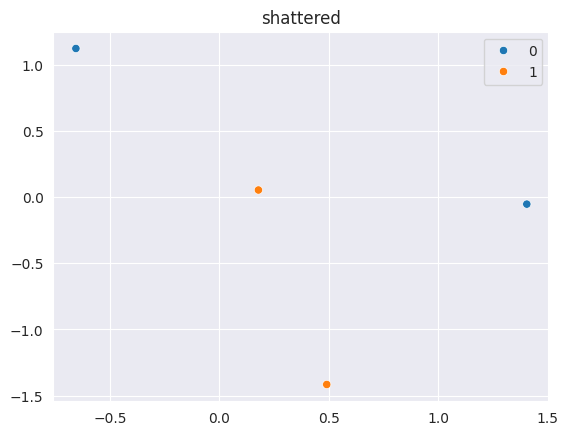

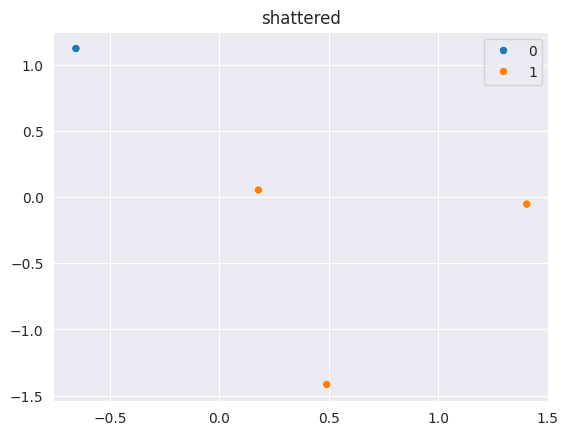

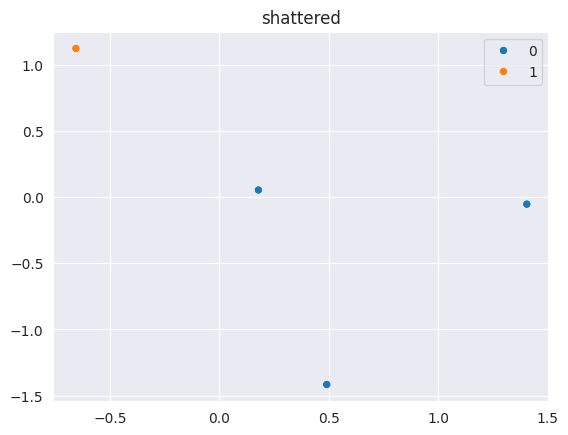

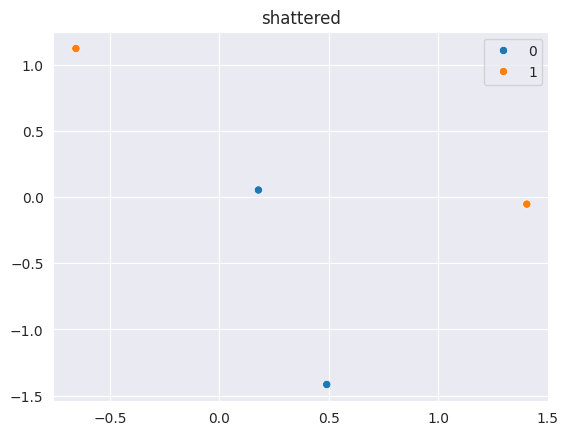

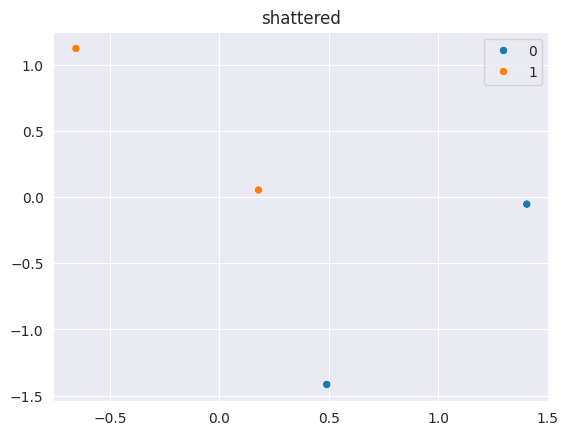

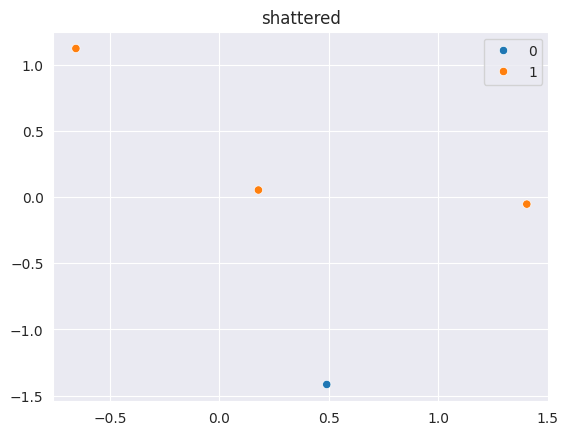

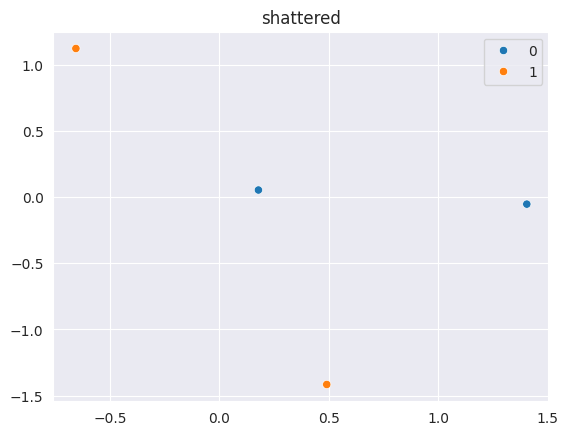

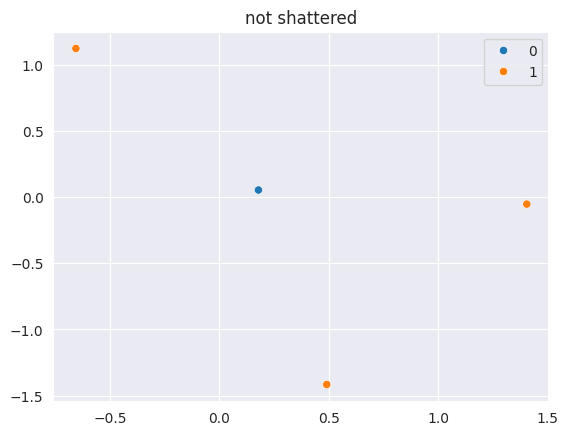

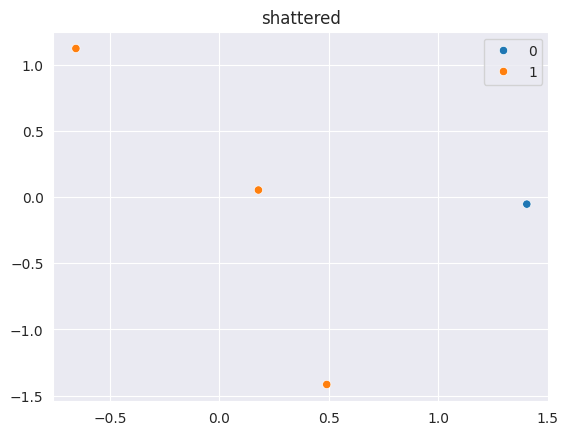

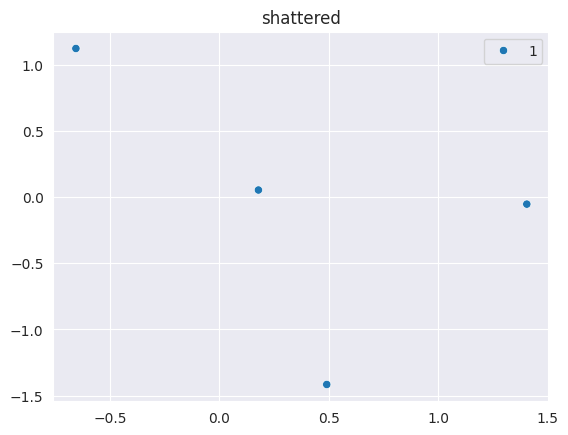

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for perm in product([0,1], repeat=n):
    fig, ax = plt.subplots()
    sns.scatterplot(x=point_set[:, 0], y=point_set[:, 1], hue=perm, ax=ax)
    plt.title("shattered" if shatter(perm, point_set ) else "not shattered")
    fig.show()

### d)

In [6]:
# code

data = []

for d in range(2, 11):
    for n in range(1, 14):
        print(d, n)
        shatters = []
        for _ in range(50):
            sn = np.random.normal(size=(n, d))
            shat = is_shattered(d, n, sn)
            shatters.append(shat)
            if shat:
                break
        data.append((d, n, any(shatters)))
        if not any(shatters):
            break

data

2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
3 5
4 1
4 2
4 3
4 4
4 5
4 6
5 1
5 2
5 3
5 4
5 5
5 6
5 7
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12


[(2, 1, True),
 (2, 2, True),
 (2, 3, True),
 (2, 4, False),
 (3, 1, True),
 (3, 2, True),
 (3, 3, True),
 (3, 4, True),
 (3, 5, False),
 (4, 1, True),
 (4, 2, True),
 (4, 3, True),
 (4, 4, True),
 (4, 5, True),
 (4, 6, False),
 (5, 1, True),
 (5, 2, True),
 (5, 3, True),
 (5, 4, True),
 (5, 5, True),
 (5, 6, True),
 (5, 7, False),
 (6, 1, True),
 (6, 2, True),
 (6, 3, True),
 (6, 4, True),
 (6, 5, True),
 (6, 6, True),
 (6, 7, True),
 (6, 8, False),
 (7, 1, True),
 (7, 2, True),
 (7, 3, True),
 (7, 4, True),
 (7, 5, True),
 (7, 6, True),
 (7, 7, True),
 (7, 8, True),
 (7, 9, False),
 (8, 1, True),
 (8, 2, True),
 (8, 3, True),
 (8, 4, True),
 (8, 5, True),
 (8, 6, True),
 (8, 7, True),
 (8, 8, True),
 (8, 9, True),
 (8, 10, False),
 (9, 1, True),
 (9, 2, True),
 (9, 3, True),
 (9, 4, True),
 (9, 5, True),
 (9, 6, True),
 (9, 7, True),
 (9, 8, True),
 (9, 9, True),
 (9, 10, True),
 (9, 11, False),
 (10, 1, True),
 (10, 2, True),
 (10, 3, True),
 (10, 4, True),
 (10, 5, True),
 (10, 6, 

In [10]:
import pandas as pd

df = pd.DataFrame(data)
res = df.groupby([0])[1].max()
res

0
2      4
3      5
4      6
5      7
6      8
7      9
8     10
9     11
10    12
Name: 1, dtype: int64

Text(0, 0.5, 'VC')

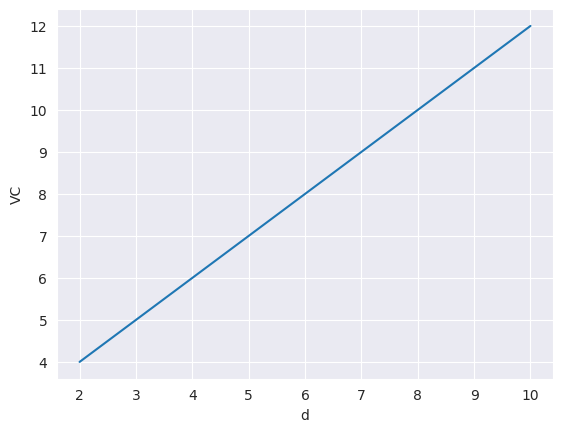

In [12]:
sns.lineplot(x=res.index, y=res)
plt.xlabel("d")
plt.ylabel("VC")

VC dimension is d+2 so the plot is correct